# Weather Anomalies Analysis with Python

**Author:** Carolina Leiva Villamil  

This project analyzes temperature anomalies over time to explore annual and monthly patterns.  
The notebook demonstrates data cleaning, exploratory data analysis, visualization, and interpretation using Python, Pandas, and Matplotlib.

## Introduction

This project is based on a dataset used in a Stanford Data Science and Data Visualization workshop.  
The goal is to explore patterns in temperature anomalies over time using essential data analysis tools in Python.

The analysis includes:
- Data loading and cleaning  
- Feature extraction (year, month)  
- Univariate analysis of temperature anomalies  
- Annual and monthly trend visualizations  
- Interpretation of climate-related patterns  

## 1. Setup and Libraries

In [ ]:
# 1. Setup and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## 2. Data loading and first look

We load the weather anomalies dataset from the Stanford workshop into a pandas DataFrame, which we refer to as `df` throughout the analysis. Each row corresponds to a daily observation with information about date, station, and the temperature anomaly (degrees from the mean).

In [ ]:
# 2. Load the weather anomalies dataset

url = "https://raw.githubusercontent.com/tsornwanee/icme-data-visualization/main/docs/weather_anomalies_data.csv"
df = pd.read_csv(url)

df.head()

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
0,2013-09-11,HARTFORD BRAINARD FLD,20.35,-72.6506,41.7361,34.4,21.7,Strong Hot
1,2013-07-16,BOISE LUCKY PEAK DAM,6.92,-116.0542,43.5253,37.8,21.1,Weak Hot
2,2013-10-04,WINTHROP UNIV,7.42,-81.0317,34.9381,30.0,13.9,Weak Hot
3,2013-11-28,WHITING FLD NAS,-12.15,-87.0167,30.7167,11.1,-3.2,Weak Cold
4,2013-06-30,TIMPANOGOS CAVE,10.43,-111.7075,40.4447,35.6,20.0,Weak Hot


## 3. Data structure and cleaning

Here we inspect the structure of the dataset, check data types, and create additional time-related columns (year and month) to help with analysis.

In [ ]:
# 3. Basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               5000 non-null   object 
 1   station_name       5000 non-null   object 
 2   degrees_from_mean  5000 non-null   float64
 3   longitude          5000 non-null   float64
 4   latitude           5000 non-null   float64
 5   max_temp           5000 non-null   float64
 6   min_temp           5000 non-null   float64
 7   type               5000 non-null   object 
dtypes: float64(5), object(3)
memory usage: 312.6+ KB


In [ ]:
# 3. Summary statistics

df.describe(include="all")

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type
count,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,359,2149,NaN,NaN,NaN,NaN,NaN,4
top,2013-05-03,GUAM INTL AP,NaN,NaN,NaN,NaN,NaN,Weak Hot
freq,75,13,NaN,NaN,NaN,NaN,NaN,2334
mean,NaN,NaN,-0.868366,-97.967102,39.098464,18.700540,6.804860,NaN
std,NaN,NaN,14.009408,20.946856,6.802073,14.731593,13.893592,NaN
min,NaN,NaN,-49.620000,-166.543300,13.483600,-37.200000,-48.300000,NaN
25%,NaN,NaN,-11.790000,-110.326300,34.756275,8.300000,-2.700000,NaN
50%,NaN,NaN,4.620000,-96.592250,39.125300,21.700000,9.400000,NaN
75%,NaN,NaN,9.900000,-85.770775,43.081825,30.600000,17.800000,NaN


In [ ]:
# 3. Convert date to datetime and create year/month columns

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

df.head()

,date,station_name,degrees_from_mean,longitude,latitude,max_temp,min_temp,type,year,month
0,2013-09-11,HARTFORD BRAINARD FLD,20.35,-72.6506,41.7361,34.4,21.7,Strong Hot,2013,9
1,2013-07-16,BOISE LUCKY PEAK DAM,6.92,-116.0542,43.5253,37.8,21.1,Weak Hot,2013,7
2,2013-10-04,WINTHROP UNIV,7.42,-81.0317,34.9381,30.0,13.9,Weak Hot,2013,10
3,2013-11-28,WHITING FLD NAS,-12.15,-87.0167,30.7167,11.1,-3.2,Weak Cold,2013,11
4,2013-06-30,TIMPANOGOS CAVE,10.43,-111.7075,40.4447,35.6,20.0,Weak Hot,2013,6


## 4. Univariate analysis: temperature anomalies

We start by looking at how the anomaly values are distributed. This helps us understand typical ranges and whether there are extreme values.

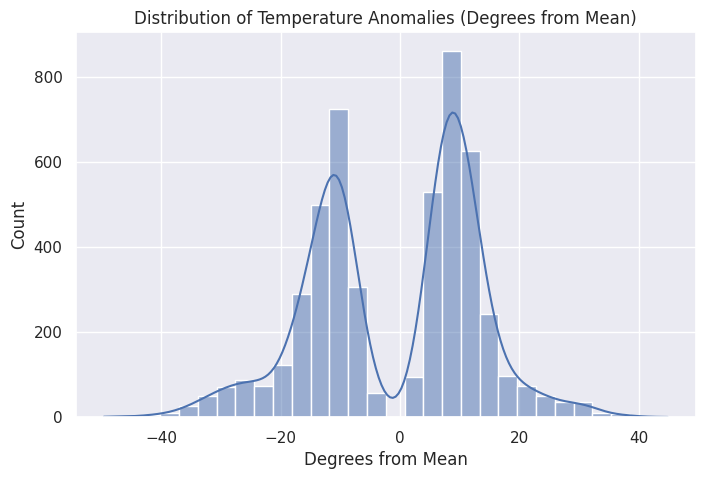

In [ ]:
# 4. Distribution of temperature anomalies

plt.figure(figsize=(8, 5))
sns.histplot(df["degrees_from_mean"], bins=30, kde=True)
plt.title("Distribution of Temperature Anomalies (Degrees from Mean)")
plt.xlabel("Degrees from Mean")
plt.ylabel("Count")
plt.show()

## 5. Yearly Temperature Trends

Before analyzing trends over time, we check how many years are included in the dataset. Although the dataset only contains entries from 2013, we still compute the average anomaly by year as part of a standard EDA workflow. This confirms the time range and helps validate the dataset structure.

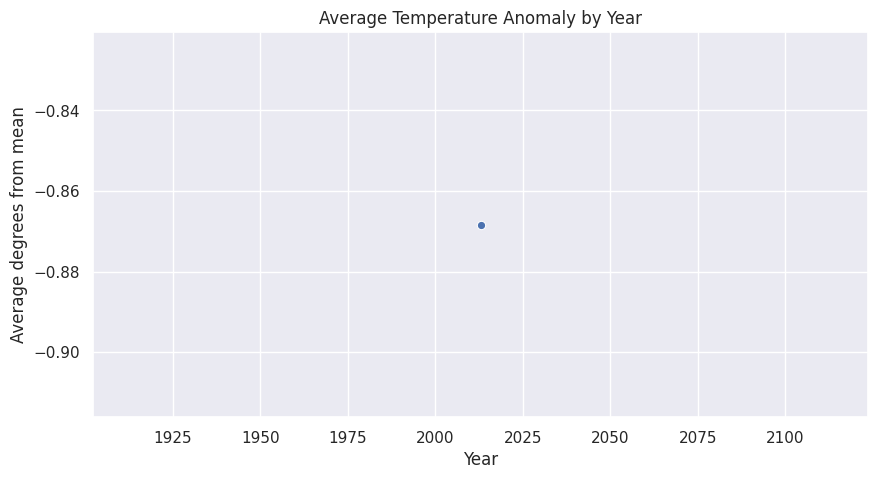

In [ ]:
# 5. Average anomaly by year

anomaly_by_year = (
    df.groupby("year")["degrees_from_mean"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=anomaly_by_year, x="year", y="degrees_from_mean", marker="o")
plt.title("Average Temperature Anomaly by Year")
plt.xlabel("Year")
plt.ylabel("Average degrees from mean")
plt.grid(True)
plt.show()

In [ ]:
df["date"].head()

,date
0,2013-09-11
1,2013-07-16
2,2013-10-04
3,2013-11-28
4,2013-06-30


In [ ]:
df["year"].unique()[:20]

array([2013], dtype=int32)

**Interpretation:**  
The dataset only contains records from the year **2013**, so we cannot analyze trends across multiple years. Nevertheless, calculating yearly averages confirms that the dataset is limited to a single year and helps validate the completeness of the data.

## 6. Monthly Temperature Patterns

The dataset only contains records from the year 2013. Therefore, analyzing trends *by year* does not make sense because there is only one unique year.

Instead, we analyze the average temperature anomaly for each month of 2013 to explore seasonal patterns.

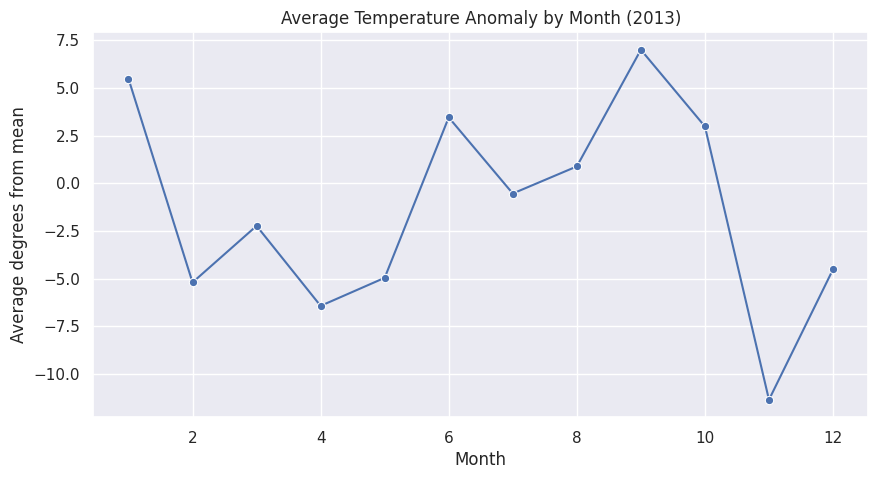

In [ ]:
# 6. Average anomaly by month (1–12)

anomaly_by_month = (
    df.groupby("month")["degrees_from_mean"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(data=anomaly_by_month, x="month", y="degrees_from_mean", marker="o")
plt.title("Average Temperature Anomaly by Month (2013)")
plt.xlabel("Month")
plt.ylabel("Average degrees from mean")
plt.grid(True)
plt.show()

## 7. Key Insights

To understand how temperature anomalies vary across locations, we calculate the
average anomaly for each weather station. This reveals which stations experience more extreme deviations from the mean temperature. However, plotting all stations results in an unreadable chart because the dataset contains hundreds of stations. Instead, we visualize the **top 10 stations with the largest deviations from the mean**, which provides insight while remaining clear.

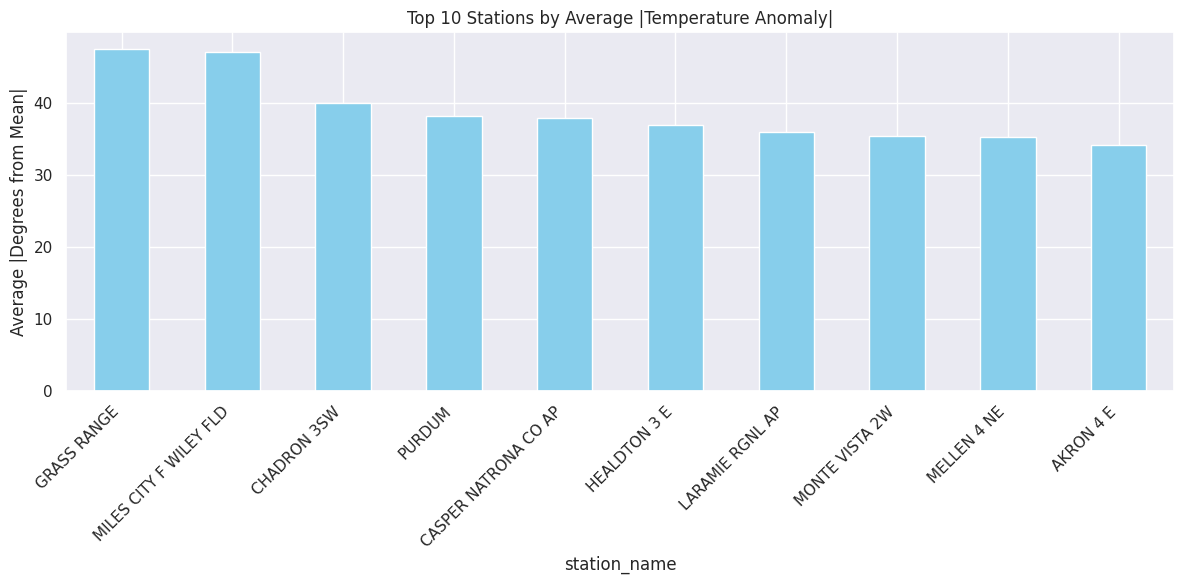

In [ ]:
# 7. Compute average anomaly per station

station_anomaly = (
    df.groupby("station_name")["degrees_from_mean"]
      .mean()
      .abs()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 6))
station_anomaly.plot(kind="bar", color="skyblue")
plt.title("Top 10 Stations by Average |Temperature Anomaly|")
plt.ylabel("Average |Degrees from Mean|")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 8. Conclusions

In this project, I explored a weather anomalies dataset using Python (pandas, seaborn, matplotlib).

Key takeaways from this analysis:

- The dataset contains only one year (2013), so temporal trends are limited.
- Temperature anomalies vary across stations, and some locations show more   extreme deviations.
- Data visualizations highlight differences in average temperature anomalies between stations.
- This notebook demonstrates the workflow of:
  - loading a dataset
  - cleaning and preparing data
  - performing exploratory analysis
  - visualizing patterns with Python

This project is based on a Stanford Data Science workshop and extended by me for portfolio and academic purposes.